In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt
import math

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model

Base = automap_base()

# reflect the tables

Base.prepare(engine, reflect=True)

In [7]:
# View all of the classes that automap found

Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table

Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.

last_date_str = session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]

last_date = dt.datetime.strptime(last_date_str,'%Y-%m-%d')

last_date

datetime.datetime(2017, 8, 23, 0, 0)

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.

first_date = last_date - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores

precipitation = session.query(
                Measurement.station,
                Measurement.date,
                Measurement.prcp,
                Measurement.tobs).\
                    filter(Measurement.date > first_date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date 
# set_index('date')

precipitation_df = pd.DataFrame(precipitation).sort_values('date')

precipitation_df['date'] = pd.to_datetime(precipitation_df['date'])

precipitation_df.dtypes

station            object
date       datetime64[ns]
prcp              float64
tobs              float64
dtype: object

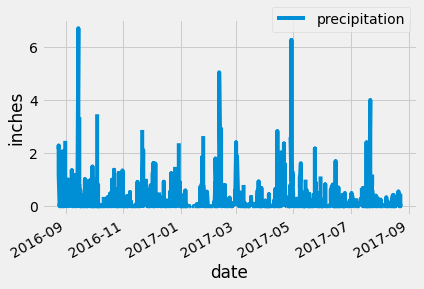

In [12]:

# Use Pandas Plotting with Matplotlib to plot the data

precipitation_df.plot(x = 'date', y = 'prcp', ylabel = "inches")
plt.legend(["precipitation"],loc='center right', bbox_to_anchor=(1.0, 1.0))


In [13]:
# Use Pandas to calcualte the summary statistics for the precipitation data

precipitation_df.describe()


,prcp,tobs
count,2015.000000,2223.000000
mean,0.176462,74.578947
std,0.460288,4.612232
min,0.000000,58.000000
25%,0.000000,71.000000
50%,0.020000,75.000000
75%,0.130000,78.000000
max,6.700000,87.000000


# Exploratory Station Analysis

In [14]:
# Design a query to calculate the total number stations in the dataset

station_count = session.query(Station.station).count()

station_count

9

In [15]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

station_activity = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).\
    order_by((func.count(Measurement.station)).desc()).all()

#session.query(Table.column, func.count(Table.column)).group_by(Table.column).all()

most_active = station_activity[0][0]

In [16]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

most_active_stats = session.query(func.avg(Measurement.tobs), 
                                  func.min(Measurement.tobs),
                                  func.max(Measurement.tobs)).\
                  filter(Measurement.station == most_active).all()

most_active_stats

[(71.66378066378067, 54.0, 85.0)]

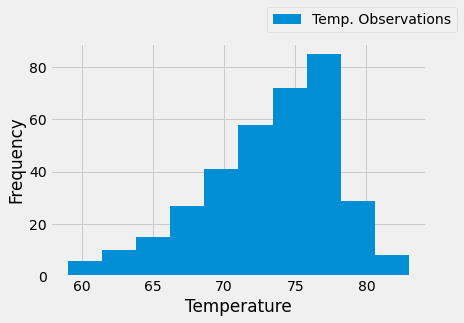

In [26]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

precip_active_station = session.query(Measurement.tobs).\
                    filter(Measurement.date > first_date).\
                    filter(Measurement.station == most_active).all()


active_station_df = pd.DataFrame(precip_active_station)

active_station_df.plot.hist()
plt.xlabel("Temperature")
plt.legend(["Temp. Observations"],loc='center right', bbox_to_anchor=(1.1, 1.1))


# Close session

In [17]:
# Close Session
session.close()